In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# File to Load
statelist_csv = "../data/statelist.csv"
cost_of_living_index_csv = "../data/cost-of-living-index.csv"
income_tax_by_state_csv = "../data/income-tax-by-state.csv"
sales_tax_csv = "../data/sales-tax.csv"
median_house_price_csv = "../data/median-housing-price.csv"
avg_grocery_csv = "../data/Avg-grocery-cost.csv"
gas_price_csv = "../data/gas-price-per-state.csv"

In [3]:
#read csv
statelist = pd.read_csv(statelist_csv)

# Income by State

In [4]:
#read income_tax file from data folder

income_tax_by_state = pd.read_csv(income_tax_by_state_csv)

income_tax_by_state.head()

,state,densityMi,pop2023,pop2022,pop2020,pop2019,pop2010,growthRate,growth,growthSince2010,lowestIncomeTaxBracket,highestIncomeTaxBracket
0,Alabama,100.67620,5098746,5074296,5031362,5006199.4,4779736,0.00482,24450,0.06674,0.020,0.050
1,Arizona,65.61541,7453517,7359197,7179943,7101150.4,6392017,0.01282,94320,0.16607,0.025,0.025
2,Arkansas,58.86715,3063152,3045637,3014195,3004367.3,2915918,0.00575,17515,0.05049,0.020,0.049
3,California,249.81347,38915693,39029342,39501653,39276883.3,37253956,-0.00291,-113649,0.04461,0.010,0.133
4,Colorado,56.62333,5868555,5839926,5784865,5709298.1,5029196,0.00490,28629,0.16690,0.044,0.044


In [5]:
#drop unnecessary columns and create new column for average of income tax

income_tax_df = income_tax_by_state.drop(columns=['densityMi', 'pop2023','pop2022', 'pop2020', 'pop2019', 'pop2010', 'growthRate', 'growth','growthSince2010'])
income_tax_df['AvgIncomeTax']=income_tax_df[['lowestIncomeTaxBracket', 'highestIncomeTaxBracket']].mean(axis=1)

#drop lowest Income and Highest Income columns
income_tax_df.drop(['lowestIncomeTaxBracket', 'highestIncomeTaxBracket'], axis=1, inplace=True)

#formatting & display results
income_tax_df.AvgIncomeTax = (income_tax_df.AvgIncomeTax * 100).map("{:,.2f}%".format)

income_tax_df.head()

,state,AvgIncomeTax
0,Alabama,3.50%
1,Arizona,2.50%
2,Arkansas,3.45%
3,California,7.15%
4,Colorado,4.40%


In [6]:
#checking against statelist to see if its missing any state
income_tax_df2 = pd.merge(statelist, income_tax_df, how="left", on=["state"])
income_tax_df2

,state,AvgIncomeTax
0,Alabama,3.50%
1,Alaska,NaN
2,Arizona,2.50%
3,Arkansas,3.45%
4,California,7.15%
5,Colorado,4.40%
6,Connecticut,5.00%
7,Delaware,4.40%
8,Florida,NaN
9,Georgia,3.38%


In [7]:
#replace NaN with 0
income_tax_df2['AvgIncomeTax'] = income_tax_df2['AvgIncomeTax'].replace(np.nan,"0.00%")
income_tax_df2

,state,AvgIncomeTax
0,Alabama,3.50%
1,Alaska,0.00%
2,Arizona,2.50%
3,Arkansas,3.45%
4,California,7.15%
5,Colorado,4.40%
6,Connecticut,5.00%
7,Delaware,4.40%
8,Florida,0.00%
9,Georgia,3.38%


In [8]:
# creating a rank column and passing the returned rank series
income_tax_df2["IncomeTaxRank"] = income_tax_df2["AvgIncomeTax"].rank(method='min', ascending=True)
  
# sorting by Avg Income Tax column
income_tax_df2.sort_values("AvgIncomeTax", inplace = True)
  
# display
income_tax_df2

,state,AvgIncomeTax,IncomeTaxRank
49,Wyoming,0.00%,1.0
27,Nevada,0.00%,1.0
39,South Carolina,0.00%,1.0
40,South Dakota,0.00%,1.0
41,Tennessee,0.00%,1.0
8,Florida,0.00%,1.0
1,Alaska,0.00%,1.0
42,Texas,0.00%,1.0
33,North Dakota,2.00%,9.0
2,Arizona,2.50%,10.0


Analysis: Less Income tax means less expenses, which is prefered.

In [9]:
#export data
income_tax_df2.to_csv("../output/incometaxRank.csv", index=False, header=True)

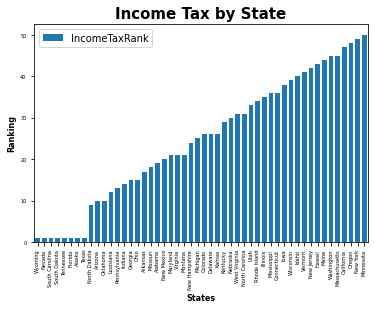

In [10]:
IncomeTaxRanking = income_tax_df2.plot(x='state', y='IncomeTaxRank', kind = "bar", width = 0.7, rot=90, fontsize=5)

plt.title('Income Tax by State', fontweight = 'bold', fontsize=15)
plt.xlabel('States', fontweight = 'bold', fontsize=8)  
plt.ylabel('Ranking', fontweight = 'bold', fontsize=8)

plt.show()

In [11]:
IncomeTaxRanking.get_figure().savefig('IncomeTaxRanking.pdf', format='pdf', bbox_inches='tight')

# Sales Tax

In [12]:
# read sales_tax csv file
sales_tax = pd.read_csv(sales_tax_csv)

sales_tax.head()

,state,densityMi,pop2023,pop2022,pop2020,pop2019,pop2010,growthRate,growth,growthSince2010,stateTaxRate,avgLocalTaxRate,combinedRate
0,Alabama,100.67620,5098746,5074296,5031362,5006199.4,4779736,0.00482,24450,0.06674,0.0400,0.0525,0.0925
1,Arizona,65.61541,7453517,7359197,7179943,7101150.4,6392017,0.01282,94320,0.16607,0.0560,0.0277,0.0837
2,Arkansas,58.86715,3063152,3045637,3014195,3004367.3,2915918,0.00575,17515,0.05049,0.0650,0.0296,0.0946
3,California,249.81347,38915693,39029342,39501653,39276883.3,37253956,-0.00291,-113649,0.04461,0.0725,0.0157,0.0882
4,Colorado,56.62333,5868555,5839926,5784865,5709298.1,5029196,0.00490,28629,0.16690,0.0290,0.0488,0.0778


In [13]:
#drop unnecessary columns and create new column for average of income tax

sales_tax_df = sales_tax.drop(columns=['densityMi', 'pop2023','pop2022', 'pop2020', 'pop2019', 'pop2010', 'growthRate', 'growth','growthSince2010','stateTaxRate', 'avgLocalTaxRate'])

#rename combined Rate column and change format
sales_tax_df.rename(columns={'combinedRate': 'statelocaltax'}, inplace=True)
sales_tax_df.statelocaltax = (sales_tax_df.statelocaltax * 100).map("{:,.2f}%".format)

#display df
sales_tax_df.head()

,state,statelocaltax
0,Alabama,9.25%
1,Arizona,8.37%
2,Arkansas,9.46%
3,California,8.82%
4,Colorado,7.78%


In [14]:
#checking against statelist to see if its missing any state
sales_tax_df2 = pd.merge(statelist, sales_tax_df, how="left", on=["state"])
sales_tax_df2

,state,statelocaltax
0,Alabama,9.25%
1,Alaska,NaN
2,Arizona,8.37%
3,Arkansas,9.46%
4,California,8.82%
5,Colorado,7.78%
6,Connecticut,6.35%
7,Delaware,NaN
8,Florida,7.02%
9,Georgia,7.40%


In [15]:
#replace NaN with 0
sales_tax_df2['statelocaltax'] = sales_tax_df2['statelocaltax'].replace(np.nan, "0.00%")
sales_tax_df2

,state,statelocaltax
0,Alabama,9.25%
1,Alaska,0.00%
2,Arizona,8.37%
3,Arkansas,9.46%
4,California,8.82%
5,Colorado,7.78%
6,Connecticut,6.35%
7,Delaware,0.00%
8,Florida,7.02%
9,Georgia,7.40%


In [16]:
# creating a rank column and passing the returned rank series
sales_tax_df2["StateLocalTaxRank"] = sales_tax_df2["statelocaltax"].rank(method='min', ascending=True)
  
# sorting by state Local sales tax column
sales_tax_df2.sort_values("statelocaltax", inplace = True)
  
# display
sales_tax_df2

,state,statelocaltax,StateLocalTaxRank
1,Alaska,0.00%,1.0
28,New Hampshire,0.00%,1.0
25,Montana,0.00%,1.0
36,Oregon,0.00%,1.0
7,Delaware,0.00%,1.0
10,Hawaii,4.44%,6.0
49,Wyoming,5.36%,7.0
48,Wisconsin,5.43%,8.0
18,Maine,5.50%,9.0
45,Virginia,5.75%,10.0


Analysis: Less State/Local Sales tax means less expenses, which is prefered. 

In [17]:
#export data
sales_tax_df2.to_csv("../output/SalesTaxRank.csv", index=False, header=True)

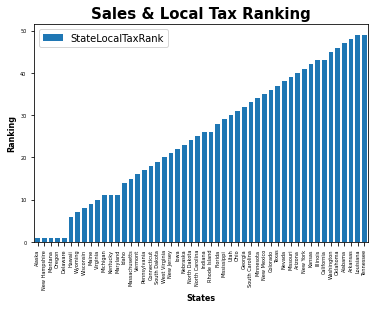

In [18]:
StateLocalTaxRanking = sales_tax_df2.plot(x='state', y='StateLocalTaxRank', kind = "bar", width = 0.7, rot=90, fontsize=5)

plt.title('Sales & Local Tax Ranking', fontweight = 'bold', fontsize=15)
plt.xlabel('States', fontweight = 'bold', fontsize=8)  
plt.ylabel('Ranking', fontweight = 'bold', fontsize=8)

plt.show()

In [19]:
StateLocalTaxRanking.get_figure().savefig('StateLocalTaxRanking.pdf', format='pdf', bbox_inches='tight')

# House Price

In [20]:
#read house_price file in data folder 

median_house_price = pd.read_csv(median_house_price_csv)
median_house_price.head()

,state,densityMi,pop2023,pop2022,pop2020,pop2019,pop2010,growthRate,growth,growthSince2010,MedianValue,medianValueZillow
0,Alabama,100.67620,5098746,5074296,5031362,5006199.4,4779736,0.00482,24450,0.06674,149600,194695
1,Alaska,1.28449,732984,733583,732923,730653.8,710231,-0.00082,-599,0.03204,275600,312988
2,Arizona,65.61541,7453517,7359197,7179943,7101150.4,6392017,0.01282,94320,0.16607,242000,416433
3,Arkansas,58.86715,3063152,3045637,3014195,3004367.3,2915918,0.00575,17515,0.05049,133600,169867
4,California,249.81347,38915693,39029342,39501653,39276883.3,37253956,-0.00291,-113649,0.04461,538500,760800


In [21]:
#drop unneccesary columns

median_house_price_df = median_house_price.drop(columns=['densityMi', 'pop2023','pop2022', 'pop2020', 'pop2019', 'pop2010', 'growthRate', 'growth', 'growthSince2010', 'MedianValue'])
median_house_price_df.head()

,state,medianValueZillow
0,Alabama,194695
1,Alaska,312988
2,Arizona,416433
3,Arkansas,169867
4,California,760800


In [22]:
#checking against statelist to see if its missing any state
median_house_price_df2 = pd.merge(statelist, median_house_price_df, how="left", on=["state"])

#replace NaN with Zillow Median House Price
median_house_price_df2['medianValueZillow'] = median_house_price_df2['medianValueZillow'].replace(np.nan, 626467)

median_house_price_df2

,state,medianValueZillow
0,Alabama,194695
1,Alaska,312988
2,Arizona,416433
3,Arkansas,169867
4,California,760800
5,Colorado,559838
6,Connecticut,343687
7,Delaware,337543
8,Florida,358018
9,Georgia,295159


In [23]:
# creating a rank column and passing the returned rank series
median_house_price_df2["HousePriceRank"] = median_house_price_df2["medianValueZillow"].rank(method='min', ascending=True)
  
# sorting by median Value zillow column
median_house_price_df2.sort_values("medianValueZillow", inplace = True)
  
# display
median_house_price_df2

,state,medianValueZillow,HousePriceRank
47,West Virginia,129103,1.0
23,Mississippi,157828,2.0
3,Arkansas,169867,3.0
35,Oklahoma,171057,4.0
14,Iowa,183418,5.0
16,Kentucky,188439,6.0
0,Alabama,194695,7.0
15,Kansas,198199,8.0
34,Ohio,199959,9.0
17,Louisiana,205972,10.0


Analysis: Lower House Price means less expenses and more affordability, which is prefered.

In [24]:
#export data
median_house_price_df2.to_csv("../output/HousePriceRank.csv", index=False, header=True)

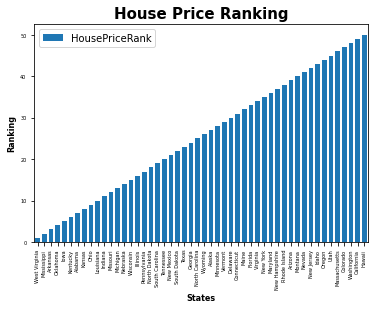

In [25]:
HousePriceRanking = median_house_price_df2.plot(x='state', y='HousePriceRank', kind = "bar", width = 0.7, rot=90, fontsize=5)

plt.title('House Price Ranking', fontweight = 'bold', fontsize=15)
plt.xlabel('States', fontweight = 'bold', fontsize=8)  
plt.ylabel('Ranking', fontweight = 'bold', fontsize=8)

plt.show()

In [26]:
HousePriceRanking.get_figure().savefig('HousePriceRanking.pdf', format='pdf', bbox_inches='tight')

# Average Grocery Expense per person by State

In [27]:
avg_grocery = pd.read_csv(avg_grocery_csv)
avg_grocery.head()

,state,City analyzed (population),Average monthly cost of groceries per person
0,Alabama,"Birmingham (212,200)",$397.39
1,Alaska,"Anchorage (291,800)",$483.24
2,Arizona,Phoenix (1.44M),$302.80
3,Arkansas,"Little Rock (193,500)",$282.46
4,California,Los Angeles (4.79M),$370.96


In [28]:
avg_grocery_df = avg_grocery.drop(columns=['City analyzed (population)'])
avg_grocery_df.head()

,state,Average monthly cost of groceries per person
0,Alabama,$397.39
1,Alaska,$483.24
2,Arizona,$302.80
3,Arkansas,$282.46
4,California,$370.96


In [29]:
#checking against statelist to see if its missing any state
avg_grocery_df2 = pd.merge(statelist, avg_grocery_df, how="left", on=["state"])

#replace NaN with $520 (Google/Sofi.com)
avg_grocery_df2['Average monthly cost of groceries per person'] = avg_grocery_df2['Average monthly cost of groceries per person'].replace(np.nan, "$520.00")

avg_grocery_df2

,state,Average monthly cost of groceries per person
0,Alabama,$397.39
1,Alaska,$483.24
2,Arizona,$302.80
3,Arkansas,$282.46
4,California,$370.96
5,Colorado,$326.92
6,Connecticut,$343.30
7,Delaware,$380.39
8,Florida,$364.25
9,Georgia,$397.97


In [30]:
# creating a rank column and passing the returned rank series
avg_grocery_df2["AvgGroceryRank"] = avg_grocery_df2["Average monthly cost of groceries per person"].rank(method='min', ascending=True)
  
# sorting By Avg Monthly grocery Cost per person column
avg_grocery_df2.sort_values("Average monthly cost of groceries per person", inplace = True)
  
# display
avg_grocery_df2

,state,Average monthly cost of groceries per person,AvgGroceryRank
28,New Hampshire,$183.00,1.0
15,Kansas,$261.35,2.0
11,Idaho,$281.12,3.0
43,Utah,$282.23,4.0
3,Arkansas,$282.46,5.0
40,South Dakota,$286.23,6.0
42,Texas,$286.64,7.0
27,Nevada,$293.43,8.0
45,Virginia,$298.01,9.0
2,Arizona,$302.80,10.0


Analysis: Less Monthly Grocery cost means less expense, and more affordability. 

In [31]:
#export data
avg_grocery_df2.to_csv("../output/GroceryExpenseRank.csv", index=False, header=True)

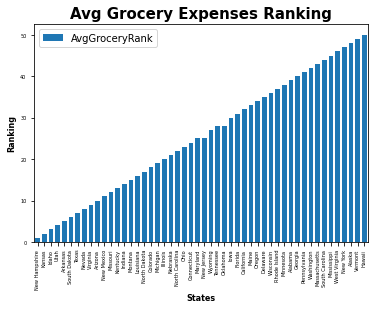

In [32]:
AvgGroceryRanking = avg_grocery_df2.plot(x='state', y='AvgGroceryRank', kind = "bar", width = 0.7, rot=90, fontsize=5)

plt.title('Avg Grocery Expenses Ranking', fontweight = 'bold', fontsize=15)
plt.xlabel('States', fontweight = 'bold', fontsize=8)  
plt.ylabel('Ranking', fontweight = 'bold', fontsize=8)

plt.show()

In [33]:
AvgGroceryRanking.get_figure().savefig('AvgGroceryRanking.pdf', format='pdf', bbox_inches='tight')

# Gas Price per State

In [34]:
gas_price_df = pd.read_csv(gas_price_csv)
gas_price_df.head()

,state,Regular
0,Alaska,3.863
1,Alabama,3.290
2,Arkansas,3.208
3,Arizona,4.527
4,California,4.892


In [35]:
columns = [col.strip() for col in gas_price_df.columns]
gas_price_df.columns = columns

In [36]:
list(gas_price_df.columns)[1]

'Regular'

In [37]:
#checking against statelist to see if its missing any state
gas_price_df2 = pd.merge(statelist, gas_price_df, how="left", on=["state"])

gas_price_df2

,state,Regular
0,Alabama,3.290
1,Alaska,3.863
2,Arizona,4.527
3,Arkansas,3.208
4,California,4.892
5,Colorado,3.556
6,Connecticut,3.477
7,Delaware,3.553
8,Florida,3.571
9,Georgia,3.392


In [38]:
# creating a rank column and passing the returned rank series
gas_price_df2["GasPriceRank"] = gas_price_df2["Regular"].rank(method='min', ascending=True)
  
# sorting By Avg Monthly grocery Cost per person column
gas_price_df2.sort_values("Regular", inplace = True)
  
# display
gas_price_df2

,state,Regular,GasPriceRank
23,Mississippi,3.156,1.0
3,Arkansas,3.208,2.0
0,Alabama,3.290,3.0
17,Louisiana,3.291,4.0
15,Kansas,3.303,5.0
24,Missouri,3.306,6.0
35,Oklahoma,3.314,7.0
42,Texas,3.324,8.0
28,New Hampshire,3.330,9.0
41,Tennessee,3.349,10.0


Analysis: Less Gas Price means less expense and more affordability. 

In [39]:
#export data
gas_price_df2.to_csv("../output/GasPriceRank.csv", index=False, header=True)

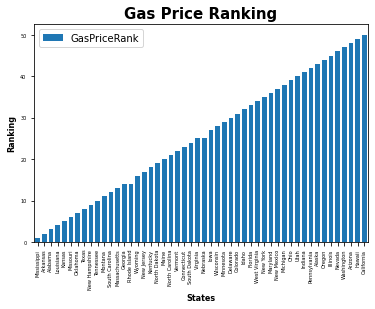

In [40]:
GasPriceRanking = gas_price_df2.plot(x='state', y='GasPriceRank', kind = "bar", width = 0.7, rot=90, fontsize=5)

plt.title('Gas Price Ranking', fontweight = 'bold', fontsize=15)
plt.xlabel('States', fontweight = 'bold', fontsize=8)  
plt.ylabel('Ranking', fontweight = 'bold', fontsize=8)

plt.show()

In [41]:
GasPriceRanking.get_figure().savefig('GasPriceRanking.pdf', format='pdf', bbox_inches='tight')

# Merging Data 

In [42]:
#merge income_tax and house_price by state
cost_of_living_merge1 = pd.merge(sales_tax_df2, income_tax_df2,  how = "left", on=["state"])

#drop columns
cost_of_living_merge1.drop(['AvgIncomeTax', 'statelocaltax'],axis=1, inplace=True)

cost_of_living_merge1

,state,StateLocalTaxRank,IncomeTaxRank
0,Alaska,1.0,1.0
1,New Hampshire,1.0,24.0
2,Montana,1.0,21.0
3,Oregon,1.0,48.0
4,Delaware,1.0,26.0
5,Hawaii,6.0,43.0
6,Wyoming,7.0,1.0
7,Wisconsin,8.0,39.0
8,Maine,9.0,44.0
9,Virginia,10.0,21.0


In [43]:
cost_of_living_merge2 = pd.merge(cost_of_living_merge1, median_house_price_df2, how="left", on=["state"])
cost_of_living_merge2.drop(['medianValueZillow'],axis=1, inplace=True)
cost_of_living_merge2.head()

,state,StateLocalTaxRank,IncomeTaxRank,HousePriceRank
0,Alaska,1.0,1.0,27.0
1,New Hampshire,1.0,24.0,37.0
2,Montana,1.0,21.0,40.0
3,Oregon,1.0,48.0,44.0
4,Delaware,1.0,26.0,30.0


In [44]:
cost_of_living_merge3 = pd.merge(cost_of_living_merge2, avg_grocery_df2, how="left", on=["state"])
cost_of_living_merge3.drop(['Average monthly cost of groceries per person'],axis=1, inplace=True)
cost_of_living_merge3.head()

,state,StateLocalTaxRank,IncomeTaxRank,HousePriceRank,AvgGroceryRank
0,Alaska,1.0,1.0,27.0,48.0
1,New Hampshire,1.0,24.0,37.0,1.0
2,Montana,1.0,21.0,40.0,15.0
3,Oregon,1.0,48.0,44.0,34.0
4,Delaware,1.0,26.0,30.0,35.0


In [45]:
cost_of_living_merge4 = pd.merge(cost_of_living_merge3, gas_price_df2, how="left", on=["state"])
cost_of_living_merge4.drop(['Regular'],axis=1, inplace=True)
cost_of_living_merge4.head()

,state,StateLocalTaxRank,IncomeTaxRank,HousePriceRank,AvgGroceryRank,GasPriceRank
0,Alaska,1.0,1.0,27.0,48.0,43.0
1,New Hampshire,1.0,24.0,37.0,1.0,9.0
2,Montana,1.0,21.0,40.0,15.0,11.0
3,Oregon,1.0,48.0,44.0,34.0,44.0
4,Delaware,1.0,26.0,30.0,35.0,30.0


# Rating and Analysis

In [46]:
CostOfLiving_Rank = pd.DataFrame(cost_of_living_merge4)

CostOfLiving_Rank

,state,StateLocalTaxRank,IncomeTaxRank,HousePriceRank,AvgGroceryRank,GasPriceRank
0,Alaska,1.0,1.0,27.0,48.0,43.0
1,New Hampshire,1.0,24.0,37.0,1.0,9.0
2,Montana,1.0,21.0,40.0,15.0,11.0
3,Oregon,1.0,48.0,44.0,34.0,44.0
4,Delaware,1.0,26.0,30.0,35.0,30.0
5,Hawaii,6.0,43.0,50.0,50.0,49.0
6,Wyoming,7.0,1.0,26.0,27.0,16.0
7,Wisconsin,8.0,39.0,15.0,36.0,28.0
8,Maine,9.0,44.0,32.0,33.0,20.0
9,Virginia,10.0,21.0,34.0,9.0,25.0


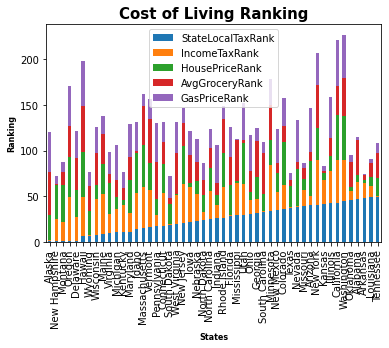

In [47]:
CostOfLiving_Rank.plot.bar(x='state', stacked=True, title='Cost of Living Ranking')

plt.title('Cost of Living Ranking', fontweight = 'bold', fontsize=15)
plt.xlabel('States', fontweight = 'bold', fontsize=8)  
plt.ylabel('Ranking', fontweight = 'bold', fontsize=8)

plt.show()

In [48]:
#Calculate Total Score 

CostOfLiving_Rank['TotalScore'] = cost_of_living_merge4['IncomeTaxRank'] + cost_of_living_merge4['StateLocalTaxRank'] + cost_of_living_merge4['HousePriceRank'] + cost_of_living_merge4['AvgGroceryRank'] + cost_of_living_merge4['GasPriceRank']

#Average Rank Score
CostOfLiving_Rank["CostOfLiving_RankScore"] = CostOfLiving_Rank['TotalScore'].rank(method='min', ascending=True)


CostOfLiving_Rank


,state,StateLocalTaxRank,IncomeTaxRank,HousePriceRank,AvgGroceryRank,GasPriceRank,TotalScore,CostOfLiving_RankScore
0,Alaska,1.0,1.0,27.0,48.0,43.0,120.0,22.0
1,New Hampshire,1.0,24.0,37.0,1.0,9.0,72.0,1.0
2,Montana,1.0,21.0,40.0,15.0,11.0,88.0,10.0
3,Oregon,1.0,48.0,44.0,34.0,44.0,171.0,45.0
4,Delaware,1.0,26.0,30.0,35.0,30.0,122.0,23.0
5,Hawaii,6.0,43.0,50.0,50.0,49.0,198.0,47.0
6,Wyoming,7.0,1.0,26.0,27.0,16.0,77.0,5.0
7,Wisconsin,8.0,39.0,15.0,36.0,28.0,126.0,28.0
8,Maine,9.0,44.0,32.0,33.0,20.0,138.0,36.0
9,Virginia,10.0,21.0,34.0,9.0,25.0,99.0,13.0


In [49]:
#export data
CostOfLiving_Rank.to_csv("../output/CostOfLiving_Rank.csv", index=False, header=True)

In [50]:
AvgCostOfLiving = CostOfLiving_Rank.drop(columns=['StateLocalTaxRank', 'IncomeTaxRank', 'HousePriceRank', 'AvgGroceryRank', 'GasPriceRank', 'TotalScore'])

AvgCostOfLiving1 = AvgCostOfLiving.sort_values(by='CostOfLiving_RankScore', ascending=True)

AvgCostOfLiving1
                    

,state,CostOfLiving_RankScore
1,New Hampshire,1.0
18,South Dakota,1.0
47,Arkansas,3.0
36,Texas,4.0
6,Wyoming,5.0
11,Kentucky,5.0
41,Kansas,7.0
38,Missouri,8.0
23,North Dakota,8.0
2,Montana,10.0


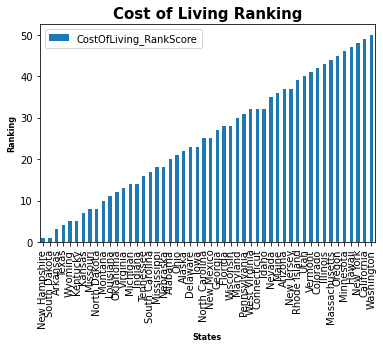

In [51]:
AvgCostOfLiving1.plot.bar(x='state', stacked=True, title='Cost of Living Ranking')

plt.title('Cost of Living Ranking', fontweight = 'bold', fontsize=15)
plt.xlabel('States', fontweight = 'bold', fontsize=8)  
plt.ylabel('Ranking', fontweight = 'bold', fontsize=8)

plt.show()

In [52]:
AvgCostOfLiving1.get_figure().savefig('AvgCostOfLiving.pdf', format='pdf', bbox_inches='tight')

AttributeError: 'DataFrame' object has no attribute 'get_figure'

CHALLENGE: Issues with Missing States and Missing Values in some files, resulting in replacing with 0 or Manual Google search. This causes the discrepancy in dtypes and cannot graph with actual values. If have more time, Will edit the dtypes to provide graphs with more specific data instead of only ranking. 